In [384]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [385]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [386]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [387]:
Base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [388]:
 # reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [389]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [390]:
 # Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [391]:
 # Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [392]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [393]:
 # Use Inspector to print the column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [394]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [395]:
data=pd.read_sql("select * from Measurement inner join Station on (Measurement.station = Station.station)",conn)
data

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [396]:
to_datetime=pd.to_datetime(data['date'])
to_datetime

0       2010-01-01
1       2010-01-02
2       2010-01-03
3       2010-01-04
4       2010-01-06
           ...    
19545   2017-08-19
19546   2017-08-20
19547   2017-08-21
19548   2017-08-22
19549   2017-08-23
Name: date, Length: 19550, dtype: datetime64[ns]

In [397]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#fnd the date for the last point
last_point=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print to find the last point
last_point

#then find the date 1 year before this date 
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_before

datetime.date(2016, 8, 23)

In [398]:
date_df=data[(data['date']<='2017-08-23')&(data['date']>"2016-08-23")]
date_df

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
2364,2365,USC00519397,2016-08-24,0.08,79.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2365,2366,USC00519397,2016-08-25,0.08,80.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2366,2367,USC00519397,2016-08-26,0.00,79.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2367,2368,USC00519397,2016-08-27,0.00,77.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2368,2369,USC00519397,2016-08-28,0.01,78.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [399]:
# Perform a query to retrieve the data and precipitation scores
data_prcp_df = pd.DataFrame(date_df)
# Save the query results as a Pandas DataFrame and set the index to the date column
new_df=data_prcp_df[['date','prcp']]
new_df.groupby(['date']).sum()

# Sort the dataframe by date

df_sorted =new_df.sort_values('date',ascending=True)
df_sorted

,date,prcp
2364,2016-08-24,0.08
8825,2016-08-24,NaN
14608,2016-08-24,2.15
7331,2016-08-24,2.28
5091,2016-08-24,2.15
...,...,...
12185,2017-08-22,0.00
12186,2017-08-23,0.08
2723,2017-08-23,0.00
7634,2017-08-23,0.00


Text(0.5, 1.0, 'Precipitation in Hawaii between Aug 2016 & 2017')

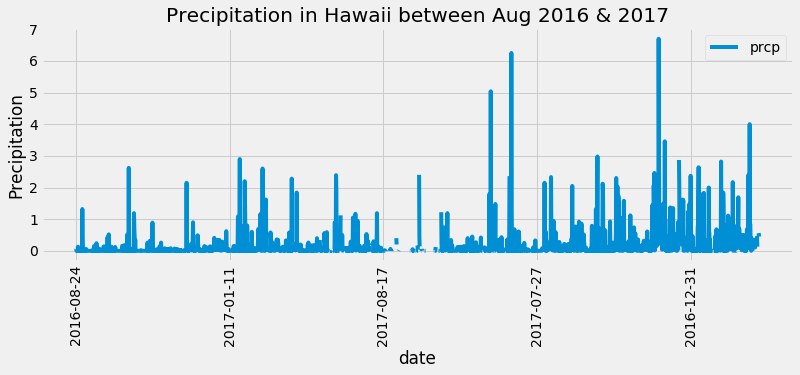

In [400]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df.plot(x="date",y="prcp",figsize=(12,4))
plt.xticks(rotation=90)
plt.ylabel("Precipitation")
plt.title("Precipitation in Hawaii between Aug 2016 & 2017")

In [401]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [402]:
 # Design a query to show how many stations are available in this dataset?
station_active=session.query(Station.station).count()
station_active

9

In [403]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
meas=pd.read_sql("select * from Measurement",conn)
stat=pd.read_sql("select * from Station",conn)
join = meas.merge(stat,on='station',how='left')
unique_join=join['station'].unique()
active_stat=meas.groupby(meas["station"]).count()
# nun_join=unique_join['station'].nunique()
# print(nun_join,unique_join)
active_stat.sort_values('id',ascending=False)

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [418]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
data_most_active=join[(join['station']=="USC00519281")]
high_temp=data_most_active['tobs'].max()
lowest_temp=data_most_active['tobs'].min()
avg_temp=data_most_active['tobs'].mean()
print(high_temp)
print(lowest_temp)
print(avg_temp)

71.66378066378067

(array([ 6., 10., 15., 27., 41., 58., 72., 85., 29.,  8.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <a list of 10 Patch objects>)

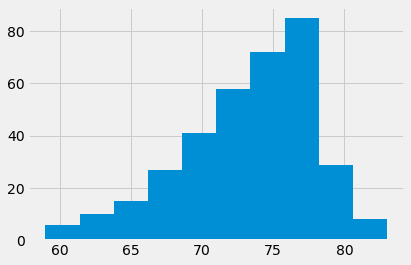

In [457]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp=session.query (Measurement.tobs).filter(Measurement.date <="2017-08-23").filter(Measurement.date >"2016-08-23").filter(Measurement.station == "USC00519281").all()
most_temp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_to_df= pd.DataFrame(most_temp)

plt.hist(temp_to_df["tobs"])

# Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
 # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [ ]:
 # Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
 # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`